In [34]:
import pandas as pd
import numpy as np

# 数据处理

In [35]:
trainO = pd.read_csv('data/train.csv')
testO = pd.read_csv('data/test.csv')
sample_submissionO = pd.read_csv('data/sample_submission.csv')

In [36]:
print(trainO.info())
print(testO.info())
print(sample_submissionO.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      23856 non-null  object
 1   Target  23856 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 372.9+ KB
None


In [37]:
# 存储被删掉的特征和被填充众数的特征
dropped_features = []
filled_features = {}
train = trainO.copy()
test = testO.copy()
sample_submission = sample_submissionO.copy()

In [38]:
# 遍历所有特征
for column in train.columns:
    # 计算缺失值的百分比
    missing_percentage = train[column].isnull().mean() * 100
    
    # 如果缺失数量超过10%，则忽略该特征
    if missing_percentage > 10:
        print(f"Ignoring {column} due to {missing_percentage:.2f}% missing values.")
        dropped_features.append(column)
        train.drop(column, axis=1, inplace=True)
    else:
        # 如果有缺失值，则用众数填充
        mode_value = train[column].mode()[0]
        train[column].fillna(mode_value, inplace=True)
        filled_features[column] = mode_value

# 打印处理后的信息
print(train.info())

# 打印被删掉的特征和被填充众数的特征
print("\nDropped Features:")
print(dropped_features)

print("\nFilled Features:")
for feature, value in filled_features.items():
    print(f"{feature}: {value}")


Ignoring v2a1 due to 71.78% missing values.
Ignoring v18q1 due to 76.82% missing values.
Ignoring rez_esc due to 82.95% missing values.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 140 entries, Id to Target
dtypes: float64(5), int64(130), object(5)
memory usage: 10.2+ MB
None

Dropped Features:
['v2a1', 'v18q1', 'rez_esc']

Filled Features:
Id: ID_0005f1903
hacdor: 0
rooms: 5
hacapo: 0
v14a: 1
refrig: 1
v18q: 0
r4h1: 0
r4h2: 1
r4h3: 2
r4m1: 0
r4m2: 1
r4m3: 2
r4t1: 0
r4t2: 2
r4t3: 4
tamhog: 4
tamviv: 4
escolari: 6
hhsize: 4
paredblolad: 1
paredzocalo: 0
paredpreb: 0
pareddes: 0
paredmad: 0
paredzinc: 0
paredfibras: 0
paredother: 0
pisomoscer: 1
pisocemento: 0
pisoother: 0
pisonatur: 0
pisonotiene: 0
pisomadera: 0
techozinc: 1
techoentrepiso: 0
techocane: 0
techootro: 0
cielorazo: 1
abastaguadentro: 1
abastaguafuera: 0
abastaguano: 0
public: 1
planpri: 0
noelec: 0
coopele: 0
sanitario1: 0
sanitario2: 0
sanitario3: 1
sanitario5: 0
sanitario6: 0
energc

# 数据分析

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# 数据统计汇总
summary = train.describe()

In [40]:
summary

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000
mean,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,0.385895,1.559171,1.945066,0.399184,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.554029,1643.774302,3.302292
std,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.680779,1.036574,1.188852,0.692460,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.504822,1741.197050,1.009565
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,3.000000,1.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,132.250000,2601.000000,4.000000
max,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,5.000000,8.000000,8.000000,6.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


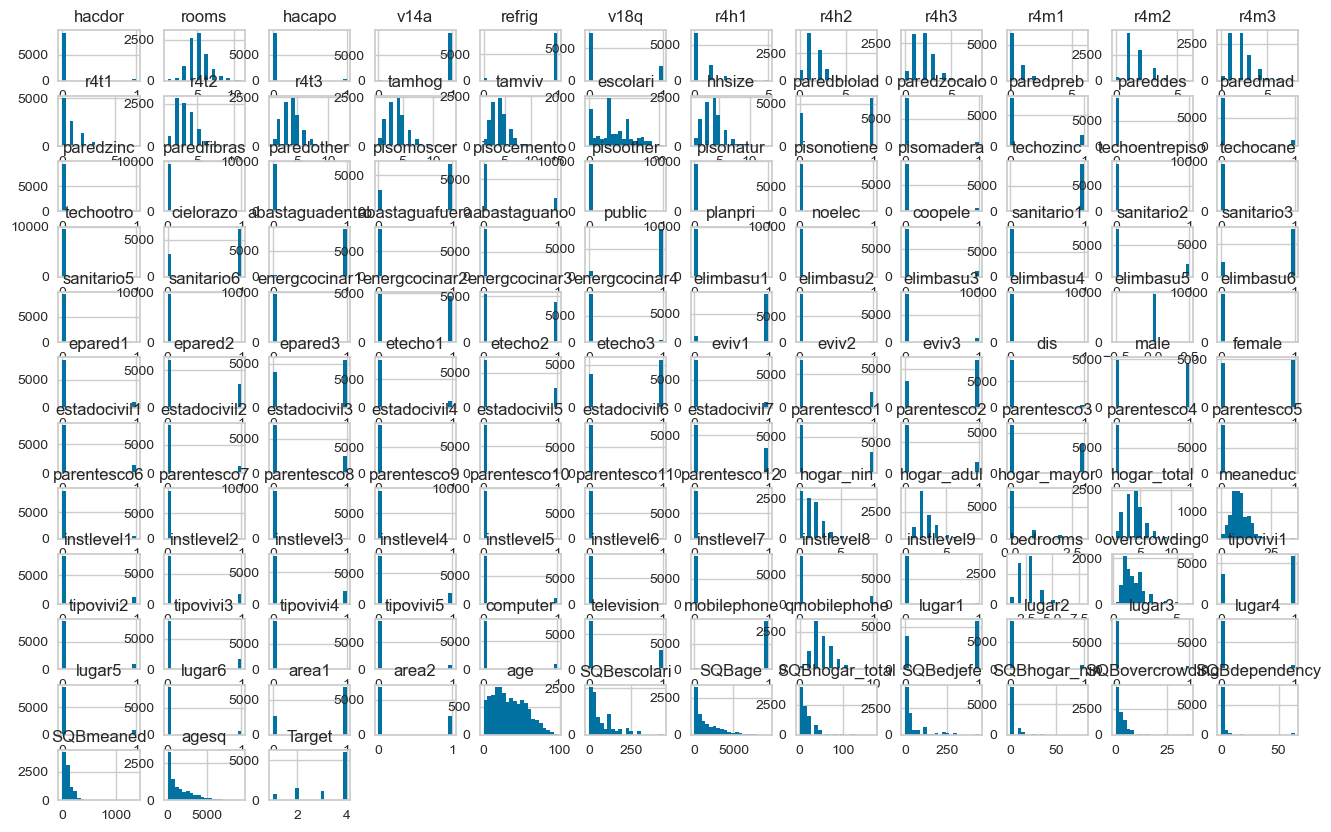

In [41]:
train.hist(bins=20, figsize=(16, 10))
plt.show()


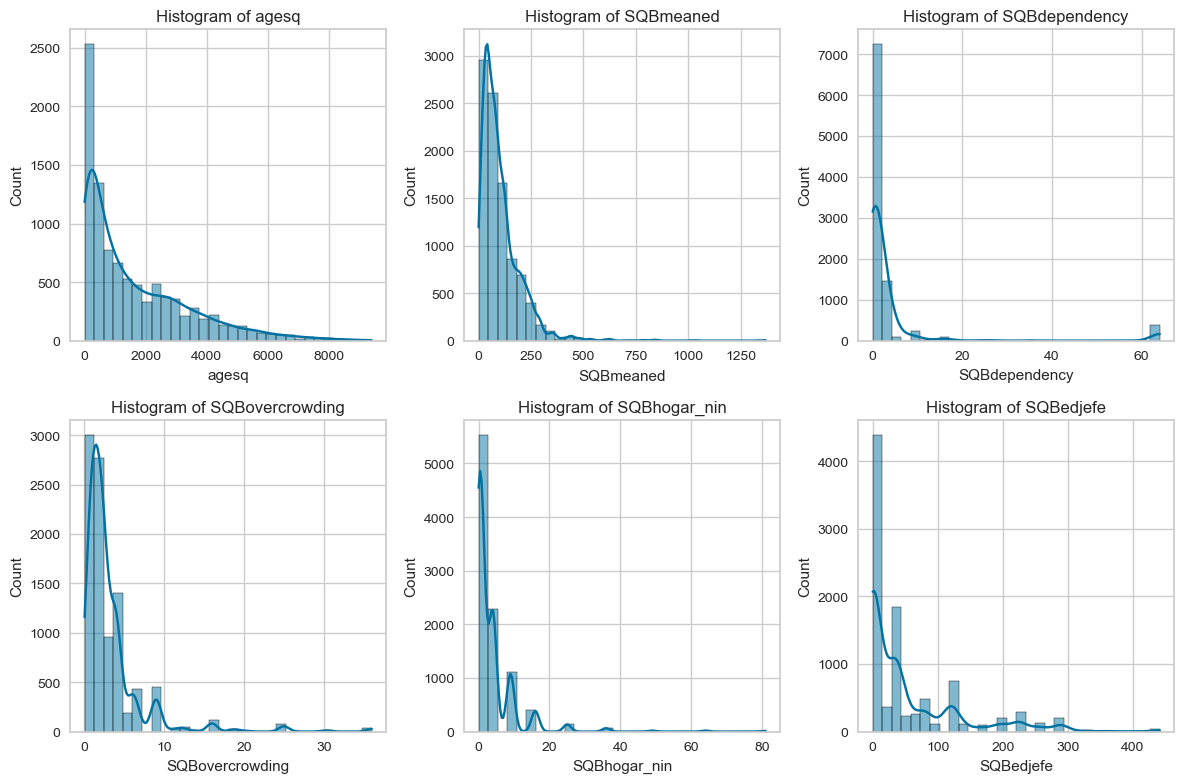

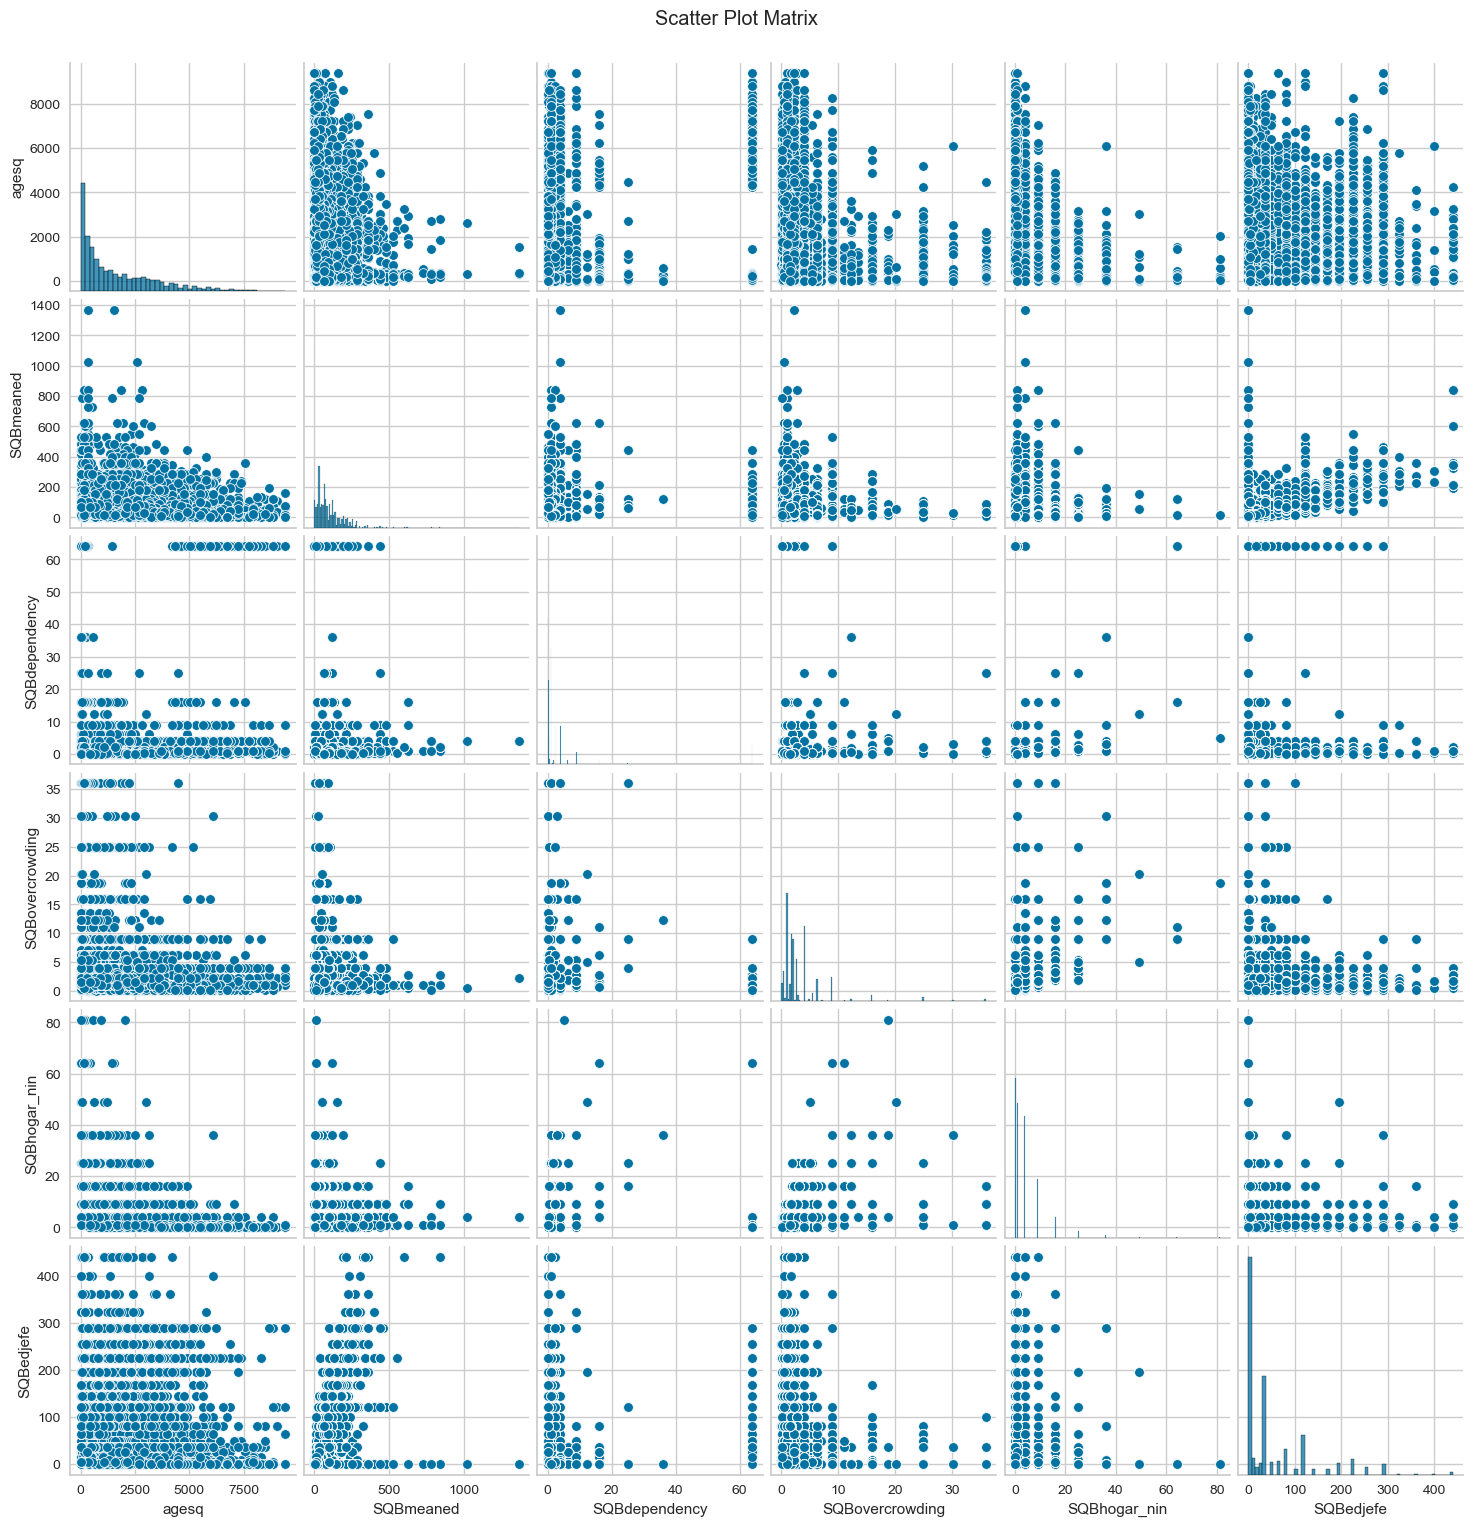

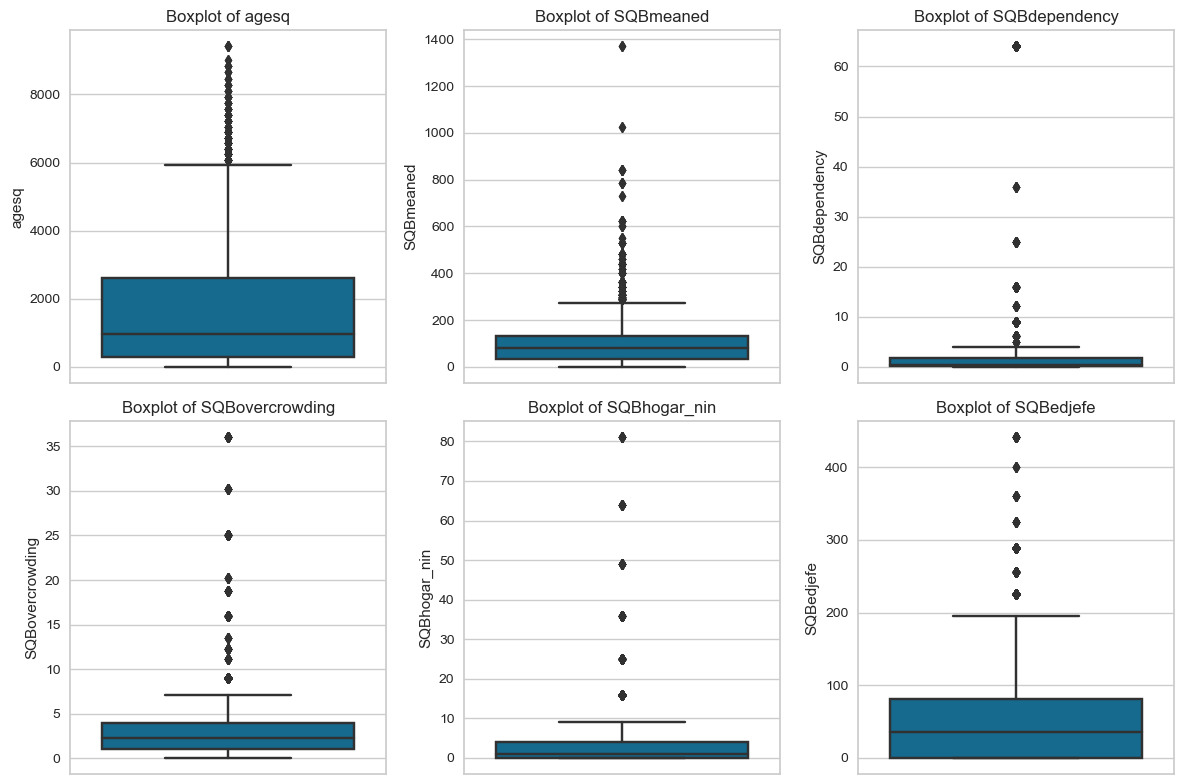

In [42]:
# 直方图
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['agesq', 'SQBmeaned', 'SQBdependency', 'SQBovercrowding', 'SQBhogar_nin', 'SQBedjefe'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(train[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

# 散点图矩阵
sns.pairplot(train[['agesq', 'SQBmeaned', 'SQBdependency', 'SQBovercrowding', 'SQBhogar_nin', 'SQBedjefe']])
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

# 箱线图
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['agesq', 'SQBmeaned', 'SQBdependency', 'SQBovercrowding', 'SQBhogar_nin', 'SQBedjefe'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=train[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


# 特征工程

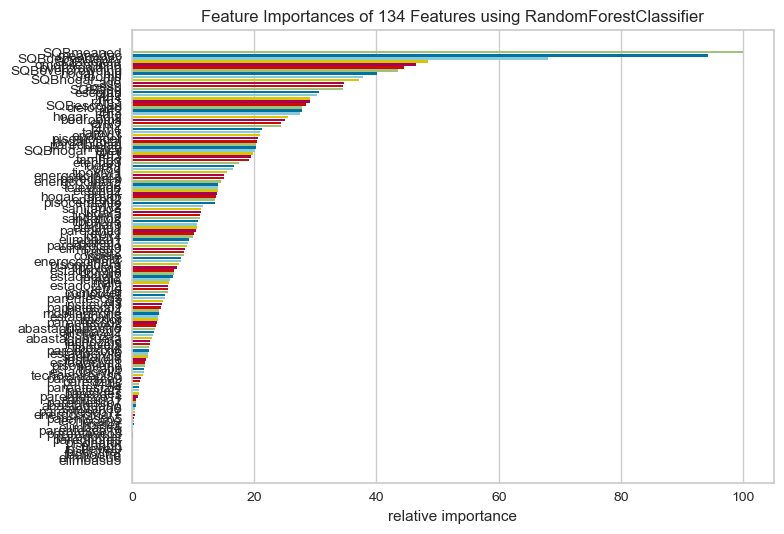

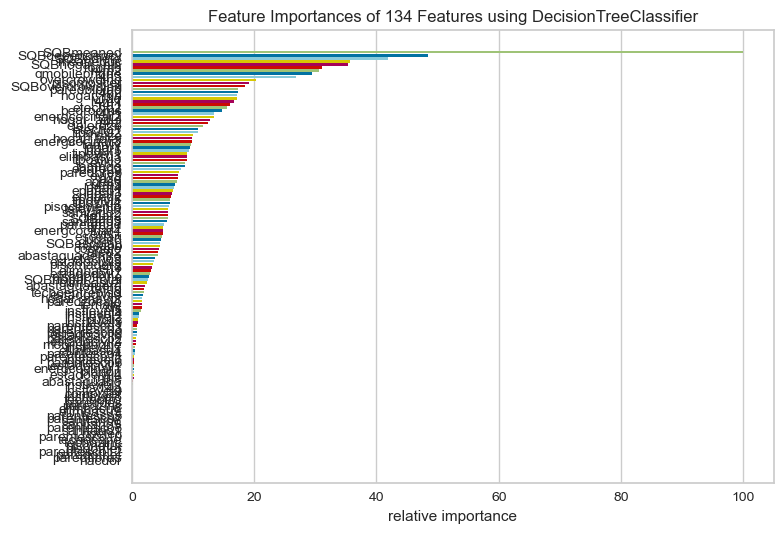

In [43]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.model_selection import FeatureImportances

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Id', 'Target', 'idhogar','dependency', 'edjefe','edjefa'], axis=1), train['Target'], test_size=0.2, random_state=42)

# 创建随机森林模型
rf_model = RandomForestClassifier(random_state=42)

# 使用 FeatureImportances 进行可视化
viz_rf = FeatureImportances(rf_model)
viz_rf.fit(X_train, y_train)
viz_rf.show()
plt.show()

# 获取随机森林特征重要性
feature_importances_rf = viz_rf.feature_importances_

# 创建决策树模型
dt_model = DecisionTreeClassifier(random_state=42)

# 使用 FeatureImportances 进行可视化
viz_dt = FeatureImportances(dt_model)
viz_dt.fit(X_train, y_train)
viz_dt.show()
plt.show()

# 获取决策树特征重要性
feature_importances_dt = viz_dt.feature_importances_

# 模型建立和评估

In [44]:
# 确定保留的特征数量
top_features_count_rf = int(0.7 * len(feature_importances_rf))

# 根据随机森林特征重要性排序，选择排名前70%的特征
selected_features_rf = X_train.columns[np.argsort(feature_importances_rf)[::-1][:top_features_count_rf]]

# 重新划分训练集和测试集，只保留选定的特征
X_train_selected_rf = X_train[selected_features_rf]
X_test_selected_rf = X_test[selected_features_rf]


# 确定保留的特征数量
top_features_count_dt = int(0.7 * len(feature_importances_dt))

# 根据决策树特征重要性排序，选择排名前70%的特征
selected_features_dt = X_train.columns[np.argsort(feature_importances_dt)[::-1][:top_features_count_dt]]

# 重新划分训练集和测试集，只保留选定的特征
X_train_selected_dt = X_train[selected_features_dt]
X_test_selected_dt = X_test[selected_features_dt]

# 随机森林模型训练和评估
rf_model.fit(X_train, y_train)
accuracy_rf_before = rf_model.score(X_test, y_test)

# 使用选定的特征进行随机森林模型训练和评估
rf_model_selected = RandomForestClassifier(random_state=42)
rf_model_selected.fit(X_train_selected_rf, y_train)
accuracy_rf_after = rf_model_selected.score(X_test_selected_rf, y_test)

# 决策树模型训练和评估
dt_model.fit(X_train, y_train)
accuracy_dt_before = dt_model.score(X_test, y_test)

# 使用选定的特征进行决策树模型训练和评估
dt_model_selected = DecisionTreeClassifier(random_state=42)
dt_model_selected.fit(X_train_selected_dt, y_train)
accuracy_dt_after = dt_model_selected.score(X_test_selected_dt, y_test)

# 打印准确率
print(f"Random Forest Accuracy before feature selection: {accuracy_rf_before:.4f}")
print(f"Random Forest Accuracy after feature selection: {accuracy_rf_after:.4f}")

print(f"\nDecision Tree Accuracy before feature selection: {accuracy_dt_before:.4f}")
print(f"Decision Tree Accuracy after feature selection: {accuracy_dt_after:.4f}")


Random Forest Accuracy before feature selection: 0.9189
Random Forest Accuracy after feature selection: 0.8834

Decision Tree Accuracy before feature selection: 0.9085
Decision Tree Accuracy after feature selection: 0.9012


In [46]:
import pandas as pd
from sklearn.metrics import accuracy_score

# 提取测试数据集中的特征
X_test_submission_rf = test[selected_features_rf]
X_test_submission_dt = test[selected_features_dt]

# 使用每个特征的众数来填充缺失值
X_test_submission_rf = X_test_submission_rf.fillna(X_test_submission_rf.mode().iloc[0])
X_test_submission_dt = X_test_submission_dt.fillna(X_test_submission_dt.mode().iloc[0])

# 使用之前训练好的随机森林模型进行预测
predictions_rf = rf_model_selected.predict(X_test_submission_rf)

# 使用之前训练好的决策树模型进行预测
predictions_dt = dt_model_selected.predict(X_test_submission_dt)

# 提取样本提交中的真实目标值
true_labels = sample_submission['Target']

# 对比预测结果与真实目标值计算准确率
accuracy_rf = accuracy_score(true_labels, predictions_rf)
accuracy_dt = accuracy_score(true_labels, predictions_dt)

print(f"Random Forest Accuracy on test data: {accuracy_rf:.4f}")
print(f"Decision Tree Accuracy on test data: {accuracy_dt:.4f}")

# 将结果导出到 sample_submission_rf.csv
submission_rf = pd.DataFrame({'Id': test['Id'], 'Target': predictions_rf})
submission_rf.to_csv('sample_submission_rf.csv', index=False)

# 将结果导出到 sample_submission_dt.csv
submission_dt = pd.DataFrame({'Id': test['Id'], 'Target': predictions_dt})
submission_dt.to_csv('sample_submission_dt.csv', index=False)


Random Forest Accuracy on test data: 0.8005
Decision Tree Accuracy on test data: 0.6074
